In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
X = pd.read_csv('mnist_train.csv')

In [155]:
X

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
Y = X['label']

In [157]:
Y = Y.values

In [158]:
X = X.drop(['label'],axis=1)

In [159]:
X = X.values

In [160]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [161]:
X.shape

(60000, 784)

In [162]:
Y = Y.reshape(60000,1)

In [163]:
Y.shape

(60000, 1)

In [164]:
X_train = X[:50000,:]

In [165]:
X_test = X[50000:,:]

In [166]:
Y_train = Y[:50000,:]

In [167]:
Y_test = Y[50000:,:]

In [168]:
X_test.shape

(10000, 784)

In [169]:
Y_test.shape

(10000, 1)

In [170]:
X_train = np.transpose(X_train)

In [171]:
Y_train = np.transpose(Y_train)

In [172]:
X_test = np.transpose(X_test)

In [173]:
Y_test = np.transpose(Y_test)

In [174]:
X_train = X_train/255

In [175]:
X_test = X_test/255

In [176]:
X_test.shape

(784, 10000)

In [177]:
Y_train.size

50000

In [178]:
n_x = 784
n_h = 128
n_y = 10
layers_dims = (n_x, n_h, n_y)

In [179]:
def sigmoid(Z):
    return 1/1+np.exp(-Z)
def sigmoid_der(Z):
    return sigmoid(Z)*(1-sigmoid(Z))

In [206]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            m=Y.size
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
#             cost = (-1 / m) * np.sum(np.multiply(Y, np.log(predictions)) + np.multiply(1 - Y, np.log(1 - predictions)))
            print("Prediction: ",predictions)
    return W1, b1, W2, b2

In [207]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 9 4 ... 4 9 9] [[5 0 4 ... 8 4 8]]
0.08892
Prediction:  [9 9 4 ... 4 9 9]
Iteration:  10
[0 0 4 ... 4 9 0] [[5 0 4 ... 8 4 8]]
0.1325
Prediction:  [0 0 4 ... 4 9 0]
Iteration:  20
[0 0 4 ... 4 9 0] [[5 0 4 ... 8 4 8]]
0.16532
Prediction:  [0 0 4 ... 4 9 0]
Iteration:  30
[0 0 2 ... 4 7 0] [[5 0 4 ... 8 4 8]]
0.2033
Prediction:  [0 0 2 ... 4 7 0]
Iteration:  40
[0 0 2 ... 4 7 8] [[5 0 4 ... 8 4 8]]
0.26994
Prediction:  [0 0 2 ... 4 7 8]
Iteration:  50
[0 0 2 ... 4 2 8] [[5 0 4 ... 8 4 8]]
0.34658
Prediction:  [0 0 2 ... 4 2 8]
Iteration:  60
[0 0 2 ... 1 2 8] [[5 0 4 ... 8 4 8]]
0.40682
Prediction:  [0 0 2 ... 1 2 8]
Iteration:  70
[0 0 3 ... 1 9 8] [[5 0 4 ... 8 4 8]]
0.45368
Prediction:  [0 0 3 ... 1 9 8]
Iteration:  80
[0 0 2 ... 1 9 8] [[5 0 4 ... 8 4 8]]
0.49474
Prediction:  [0 0 2 ... 1 9 8]
Iteration:  90
[0 0 2 ... 1 9 8] [[5 0 4 ... 8 4 8]]
0.53498
Prediction:  [0 0 2 ... 1 9 8]
Iteration:  100
[3 0 2 ... 1 9 8] [[5 0 4 ... 8 4 8]]
0.5697
Prediction:  [3 0 2 ..

In [212]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[:,index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  [5]


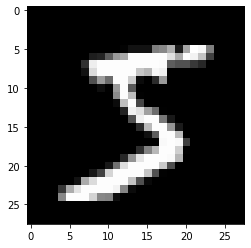

Prediction:  [0]
Label:  [0]


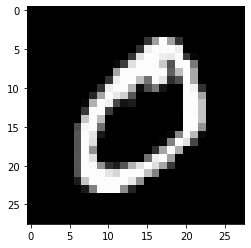

Prediction:  [2]
Label:  [4]


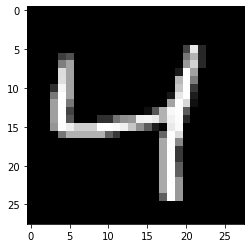

Prediction:  [1]
Label:  [1]


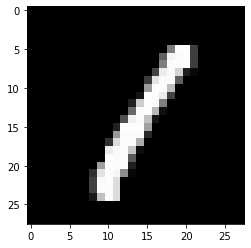

Prediction:  [9]
Label:  [9]


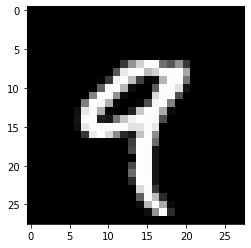

Prediction:  [2]
Label:  [2]


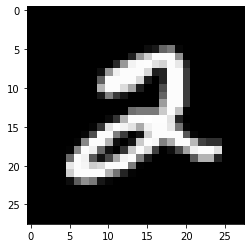

Prediction:  [1]
Label:  [1]


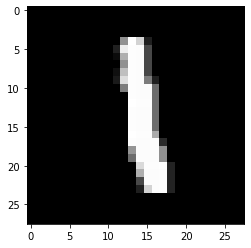

Prediction:  [3]
Label:  [3]


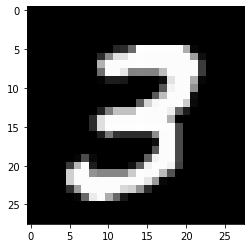

Prediction:  [1]
Label:  [1]


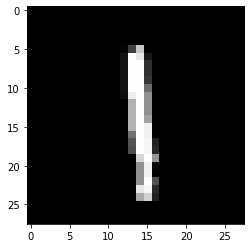

Prediction:  [4]
Label:  [4]


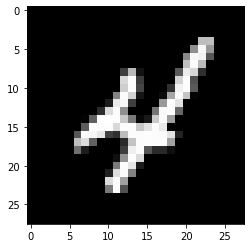

Prediction:  [3]
Label:  [3]


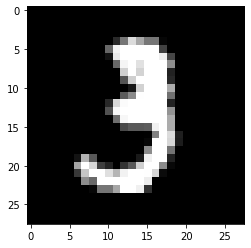

Prediction:  [8]
Label:  [5]


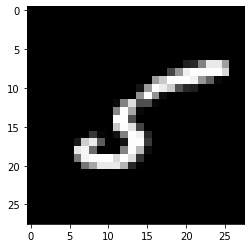

Prediction:  [3]
Label:  [3]


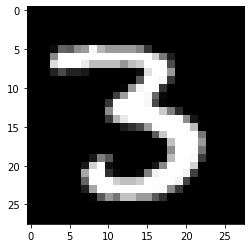

Prediction:  [6]
Label:  [6]


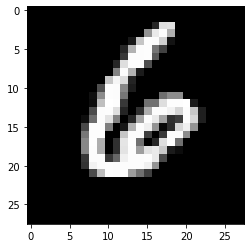

Prediction:  [1]
Label:  [1]


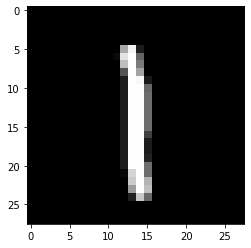

Prediction:  [7]
Label:  [7]


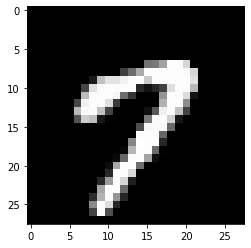

Prediction:  [2]
Label:  [2]


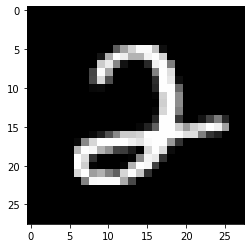

Prediction:  [8]
Label:  [8]


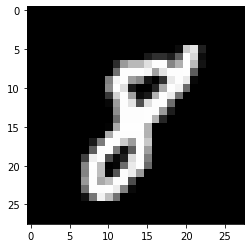

Prediction:  [6]
Label:  [6]


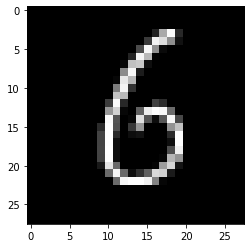

Prediction:  [9]
Label:  [9]


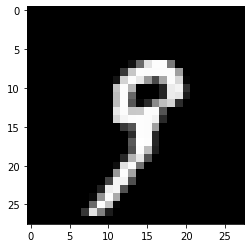

In [214]:
for i in range(20):
    test_prediction(i, W1, b1, W2, b2)


In [215]:
dev_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_test)

[3 8 6 ... 5 6 5] [[3 8 6 ... 5 6 8]]


0.8433